# Frequency domain parameters

In [1]:
import polars as pl
from plotnine import *
from datetime import datetime

In [2]:
df = pl.read_csv("../../data/HRV/freqency_domain.csv")
df = df.with_columns(pl.col("date").str.strptime(pl.Date, "%Y/%m/%d"))
df = df.with_columns((pl.col("LF") / pl.col("HF")).alias("LFHF"))
df.head()

date,VLF,LF,HF,LFHF
date,f64,f64,f64,f64
2017-07-24,884.554467,176.079683,98.624315,1.785358
2017-07-25,977.6705,271.4607,114.9889,2.360756
2017-07-26,833.683813,284.855324,167.546256,1.700159
2017-07-27,1636.069588,293.085583,222.901403,1.314866
2017-07-28,994.366727,335.918425,517.969574,0.648529


In [3]:
name = "LF"
unit = "$msec^2$"
print(len(df.filter(pl.col(name) > (df[name].std()*5 + df[name].mean()))))
a = pl.DataFrame(df.filter(pl.col(name) > (df[name].std()*5 + df[name].mean())))
(
    ggplot(data=df, mapping=aes(x="date"))
    + geom_line(aes(y=name), size=0.4)
    + geom_hline(aes(yintercept=df[name].mean()), color="red", size=1)
    + geom_point(data=df.filter(pl.col(name) > df[name].std()*5+df[name].mean()), mapping=aes(x="date", y=name), color="green")
    # + ylim()
    + labs(title=f"{name} ({unit})", x="Date", y="")
    + theme(figure_size=(12, 4),)
    + scale_x_date(
        limits=(
            datetime(year=2017, month=7, day=24),
            datetime(year=2024, month=5, day=31)
        ),
        date_labels="%Y-%m",
        date_breaks="6 month",
    #     # expand=(0, 1),
    #     date_minor_breaks="1 month",
    )
)#.save(f"../../fig/hrv/{name.lower()}.png", dpi=500)

5


/home/kota/anaconda3/envs/pystan/lib/python3.11/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 12 x 4 in image.
/home/kota/anaconda3/envs/pystan/lib/python3.11/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ../../fig/hrv/lf.png


In [4]:
a

date,VLF,LF,HF,LFHF
date,f64,f64,f64,f64
2017-08-14,1969.441511,600.694603,551.590447,1.089023
2017-12-27,745.721658,840.854005,711.024,1.182596
2022-03-11,1164.739608,529.9671,563.5723,0.940371
2022-08-16,1001.8,657.3862,504.8111,1.302242
2023-07-03,898.433838,581.4799,334.1921,1.739957


47


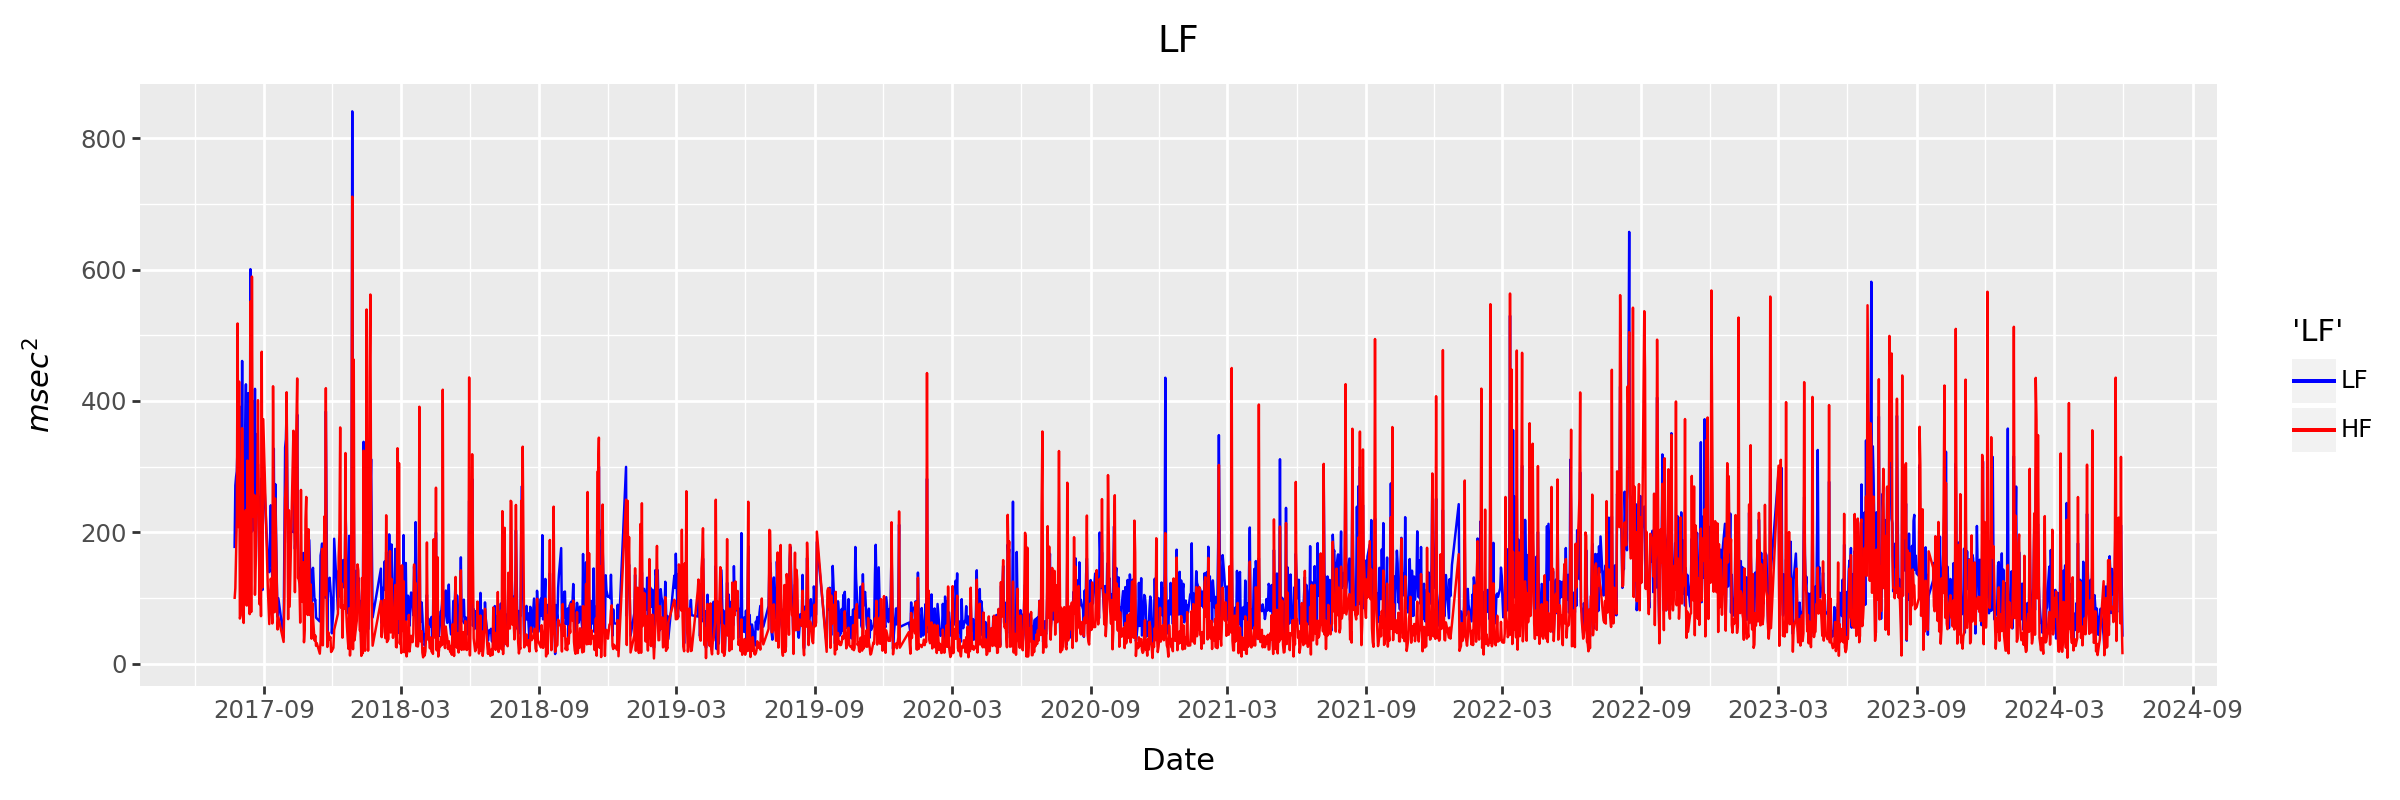

In [5]:
name = "LF"
# https://stackoverflow.com/questions/40833809/add-legend-to-geom-line-graph-in-r

print(len(df.filter(pl.col(name) > (df[name].std()*3 + df[name].mean()))))
(
    ggplot(data=df, mapping=aes(x="date"))
    + geom_line(aes(y="LF", color="'LF'"))
    + geom_line(aes(y="HF", color="'HF'"))
    + scale_color_manual(values = {"LF": "blue", "HF": "red"})
    + labs(title=name, x="Date", y="$msec^2$")
    + theme(figure_size=(12, 4))
    + scale_x_date(
        limits=(
            datetime(year=2017, month=7, day=24),
            datetime(year=2024, month=5, day=31)
        ),
        date_labels="%Y-%m",
        date_breaks="6 month",
    #     # expand=(0, 1),
    #     date_minor_breaks="1 month",
    )
)

In [6]:
# a = pl.DataFrame(df.filter(pl.col("VLF") > df["VLF"].median() + df["VLF"].std()*2))

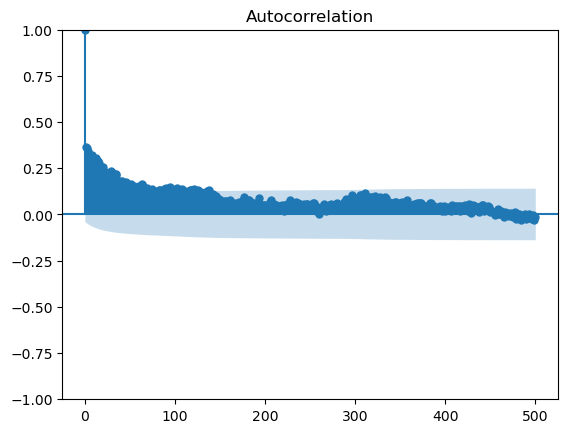

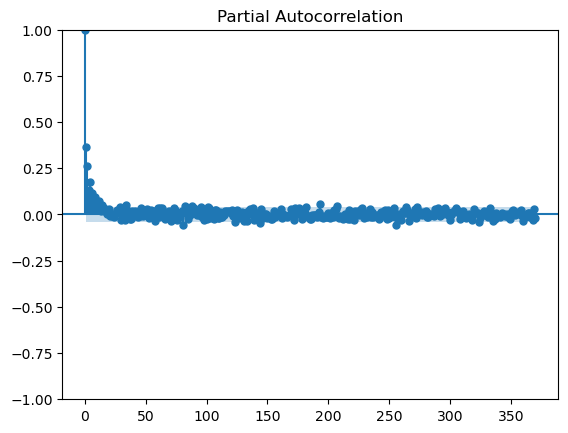

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
display(plot_acf(df["LF"], lags=500))
plot_pacf(df["LF"], lags=370)